In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image_dataset_from_directory, image

In [4]:
convBase = InceptionV3(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224, 224, 3)
)

In [5]:
convBase.trainable = True

In [6]:
for layer in convBase.layers:
    print(layer.name, layer.trainable)

input_1 True
conv2d True
batch_normalization True
activation True
conv2d_1 True
batch_normalization_1 True
activation_1 True
conv2d_2 True
batch_normalization_2 True
activation_2 True
max_pooling2d True
conv2d_3 True
batch_normalization_3 True
activation_3 True
conv2d_4 True
batch_normalization_4 True
activation_4 True
max_pooling2d_1 True
conv2d_8 True
batch_normalization_8 True
activation_8 True
conv2d_6 True
conv2d_9 True
batch_normalization_6 True
batch_normalization_9 True
activation_6 True
activation_9 True
average_pooling2d True
conv2d_5 True
conv2d_7 True
conv2d_10 True
conv2d_11 True
batch_normalization_5 True
batch_normalization_7 True
batch_normalization_10 True
batch_normalization_11 True
activation_5 True
activation_7 True
activation_10 True
activation_11 True
mixed0 True
conv2d_15 True
batch_normalization_15 True
activation_15 True
conv2d_13 True
conv2d_16 True
batch_normalization_13 True
batch_normalization_16 True
activation_13 True
activation_16 True
average_pooling2d_

In [7]:
convBase.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [9]:
for layer in convBase.layers:
    if layer.name == "conv2d_76":
        break
    else:
        layer.trainable = False

In [10]:
convBase.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [11]:
model = Sequential()
model.add(convBase)
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(169, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 169)               8

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
train_ds = image_dataset_from_directory(
    directory='./all_dataset',
    color_mode='rgb',
    validation_split=0.3,
    subset='training',
    seed=123,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    interpolation='bilinear'
)

test_ds = image_dataset_from_directory(
    directory='./all_dataset',
    color_mode='rgb',
    validation_split=0.3,
    subset='validation',
    seed=123,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    interpolation='bilinear'
)
Leaf_Name = train_ds.class_names

# Normalize pixel values to [0, 1]
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Configure the datasets for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 20626 files belonging to 169 classes.
Using 14439 files for training.
Found 20626 files belonging to 169 classes.
Using 6187 files for validation.


In [19]:
print(Leaf_Name)

['Aloevera-Aloe barbadensis', 'Amaranthus Green_Amaranthus viridis', 'Amaranthus Red_Amaranthus tricolor', 'Amla-Phyllanthus emlica Linn', 'Amruta Balli-Tinospora cordifolia', 'Arali-Nerium oleander', 'Arive_Dantu_Amaranthus viridis', 'Ashoka-Saraca asoca', 'Ashwagandha_Withania somnifera', 'Asthma plant_Euphorbia hirta', 'Astma_weed', 'Avacado_Persea americana', 'Avaram_Senna auriculata', 'Badipala', 'Balloon vine_Cardiospermum halicacabum', 'Bamboo-Bambusoideae', 'Basale_Basella alba', 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)', 'Bellyache bush (Green)_Jatropha gossypiifolia', 'Benghal dayflower_ Commelina benghalensis', 'Betel-Piper betle', 'Betel_Nut_Areca catechu', 'Big Caltrops_Tribulus terrestris', 'Black-Honey Shrub_Tribulus terrestris', 'Brahmi-Bacopa monnieri', 'Bringaraja-Eclipta prostrata', 'Bristly Wild Grape_Cissus quadrangularis', 'Butterfly Pea_Clitoria ternatea', 'Camphor-Cinnamomum camphora', 'Cape Gooseberry_Physalis peruviana', 'Cardiospermum halicacabum',

In [20]:
hist = model.fit(train_ds, epochs = 30, validation_data = test_ds)

Epoch 1/30
452/452 [==============================] - 250s 486ms/step - loss: 3.2517 - accuracy: 0.3042 - val_loss: 1.5555 - val_accuracy: 0.5862
Epoch 2/30
452/452 [==============================] - 130s 288ms/step - loss: 1.1578 - accuracy: 0.6735 - val_loss: 0.9879 - val_accuracy: 0.7320
Epoch 3/30
452/452 [==============================] - 131s 291ms/step - loss: 0.5904 - accuracy: 0.8267 - val_loss: 0.9284 - val_accuracy: 0.7774
Epoch 4/30
452/452 [==============================] - 129s 285ms/step - loss: 0.3948 - accuracy: 0.8816 - val_loss: 0.9618 - val_accuracy: 0.7758
Epoch 5/30
452/452 [==============================] - 141s 313ms/step - loss: 0.2859 - accuracy: 0.9129 - val_loss: 0.9091 - val_accuracy: 0.8007
Epoch 6/30
452/452 [==============================] - 137s 303ms/step - loss: 0.2673 - accuracy: 0.9205 - val_loss: 0.8189 - val_accuracy: 0.8208
Epoch 7/30
452/452 [==============================] - 131s 291ms/step - loss: 0.2156 - accuracy: 0.9357 - val_loss: 1.0343 -

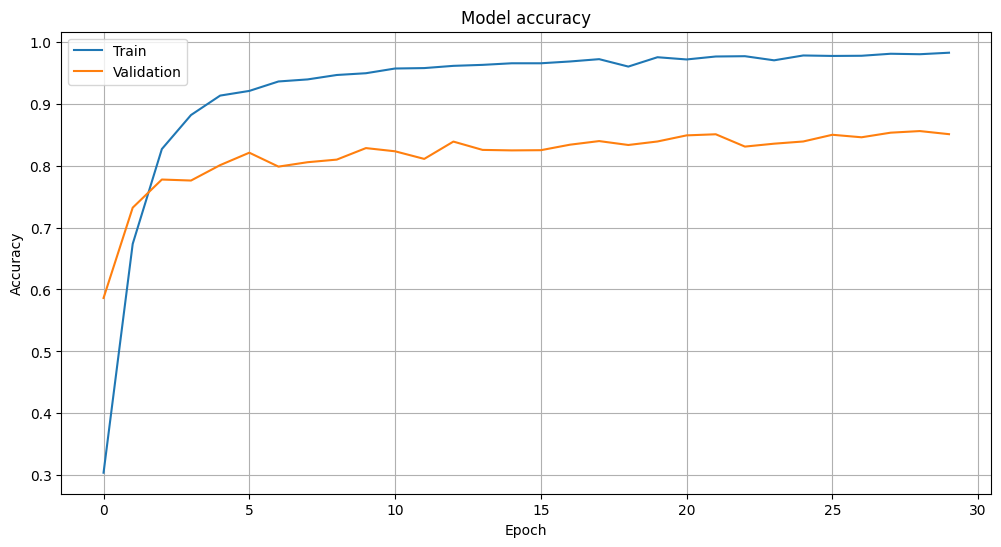

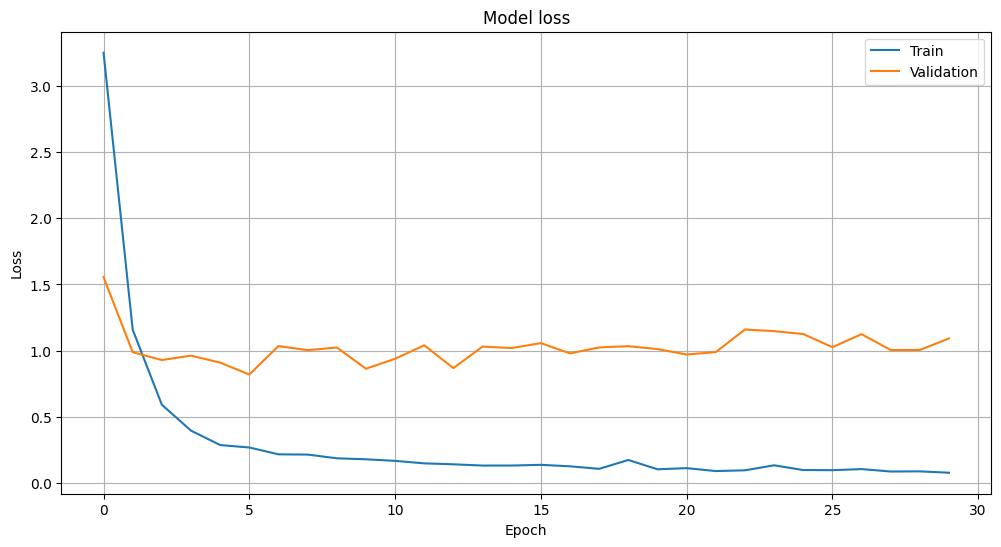

In [21]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.savefig('Accuracytl20in.png')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)
    plt.savefig('Losstl20in.png')
    plt.show()

plot_history(hist)

In [22]:
model.save('trained_model.h5')

In [25]:
import base64
import io
from PIL import Image
import numpy as np

1/1 [==============================] - 0s 64ms/step


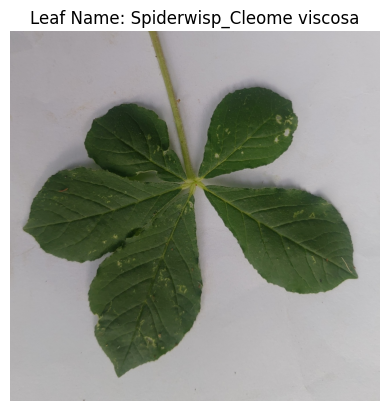

In [29]:
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to display image with prediction
def display_image_with_prediction(img_path, predicted_class):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_class[0]}')
    plt.title(f'Leaf Name: {Leaf_Name[predicted_class[0]]}')
    plt.axis('off')
    plt.show()

# Load and preprocess the image
img_path = 'test2.jpg'  # Replace with your image path
preprocessed_image = preprocess_image(img_path)

# Make predictions
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions, axis=1)

# Display the image with the prediction
display_image_with_prediction(img_path, predicted_class)

In [30]:
import pickle 

In [31]:
model_file = 'model.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(model, file)

hist_file = 'hist.pkl'
with open(hist_file, 'wb') as file:
    pickle.dump(hist, file)


LeafName_file = 'LeafName.pkl'
with open(LeafName_file, 'wb') as file:
    pickle.dump(Leaf_Name, file)


INFO:tensorflow:Assets written to: ram://d831aab5-a521-4764-a704-a7c262c2fdb1/assets


INFO:tensorflow:Assets written to: ram://d831aab5-a521-4764-a704-a7c262c2fdb1/assets


INFO:tensorflow:Assets written to: ram://157924b8-776b-4324-88af-9e8e1e8324fe/assets


INFO:tensorflow:Assets written to: ram://157924b8-776b-4324-88af-9e8e1e8324fe/assets


In [1]:
import pickle

In [2]:
with open('hist.pkl', 'rb') as file:
    hist = pickle.load(file)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://f313652f-b0a3-4a3a-bc27-be4b2df0a03d/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.